<a href="https://colab.research.google.com/github/MeanJun/MusicGenre/blob/main/Genre_classification6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing
from sklearn import neural_network
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegressionCV
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
import pandas as pd
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay

from google.colab import drive
drive.mount('/content/drive')

import os
os.chdir('/content/drive/My Drive/Colab Notebooks')

df = pd.read_csv("ML_Project_Frequency_Distributions(1).csv")
print(df)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
                                                 Title            0  \
0                                  10-abbey_rhodes.mp3      1043621   
1                     10-at_least_you've_been_told.mp3      2126883   
2               10-brilliant_day_(eine_kleine_mix).mp3      3638673   
3                      10-carefully_watch_the_news.mp3      2498355   
4                        10-echoes_of_the_big_bang.mp3  12633950144   
...                                                ...          ...   
1428                somewhere-in-the-clouds-184456.wav       230115   
1429                          soul-of-dubai-165180.wav     43787068   
1430  tamil-comedy-bgm-for-reels-and-shorts-139304.wav      1920438   
1431                  the-girl-from-ireland-177450.wav     74765199   
1432                            the-ramadan-188837.wav    559262022   

               200

In [3]:
y = df['Genre']

Xi = []
for column_name in df.columns:
  if '0' in column_name:
    Xi.append(column_name)

X = df[Xi]
display(X)

,0,200,400,600,800,1000,1200,1400,1600,1800,...,18000,18200,18400,18600,18800,19000,19200,19400,19600,19800
0,1043621,6.174077e+07,2.047628e+08,3.878327e+08,43762172.30,4.884440e+06,1.731180e+07,6.923562e+06,1.728419e+06,1.097927e+07,...,2384.000186,2411.610402,1754.836694,1913.843566,2566.356447,1166.833088,753.321428,2477.249148,1230.352088,788.631319
1,2126883,1.391849e+08,8.998469e+07,1.171315e+08,79548896.75,3.387833e+07,3.675010e+07,4.422236e+07,1.228403e+07,9.543494e+06,...,24912.923230,19561.752830,49134.077460,23466.887240,6684.936444,83976.038140,5681.113413,16540.174520,26777.469810,39033.317830
2,3638673,7.667548e+06,1.335264e+07,1.898063e+07,22041971.77,5.892001e+06,9.928671e+05,2.514030e+06,2.312663e+07,2.726887e+06,...,1808.905693,1754.348879,2380.075771,2799.921865,2397.215117,3060.009491,2120.585649,2372.546729,2653.544784,1731.706378
3,2498355,2.452500e+08,6.596359e+07,9.187554e+07,52900587.70,2.163944e+07,5.459262e+07,2.057038e+07,1.404666e+07,6.839765e+06,...,8720.719579,7984.793342,9126.964638,4856.855111,7473.337512,9129.491911,6973.661419,8691.579700,8577.869889,8380.539834
4,12633950144,2.344230e+07,7.651874e+07,9.061877e+06,88275540.13,2.283532e+06,4.892226e+07,9.276679e+06,5.144914e+07,2.932875e+06,...,73223.639630,18513.552650,34590.849930,26508.658900,71477.055680,13465.560970,91316.783600,35046.101910,31169.952770,40243.379180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1428,230115,2.658727e+07,2.008053e+08,6.485656e+07,53583334.57,7.993349e+06,4.649832e+07,1.456040e+07,3.830695e+07,3.027184e+07,...,533.228466,664.226145,1012.785569,1227.141176,644.967497,931.464923,481.317277,344.487630,813.793171,824.823032
1429,43787068,1.189417e+08,1.027792e+08,2.297040e+07,56467480.46,5.331166e+06,9.156309e+07,1.186552e+07,5.494317e+07,8.816054e+06,...,5530.530466,4087.916622,7565.595333,3996.340023,2339.546788,6890.781898,4063.788977,7660.720919,2356.332830,10498.729370
1430,1920438,4.680251e+07,3.979945e+07,2.050838e+07,19509767.05,2.961714e+06,1.239209e+07,3.078131e+06,6.683750e+06,5.243632e+06,...,1373.543878,10567.028430,9018.496753,8845.084532,5592.151900,4841.477950,10063.064870,3558.198442,11935.343720,8452.489487
1431,74765199,1.961060e+08,1.069926e+08,1.429322e+07,33945857.30,6.774219e+06,1.097531e+07,2.804238e+06,1.711634e+07,1.848868e+07,...,171.377712,503.120565,1006.387829,693.719941,528.009908,66.748512,965.164054,279.279473,1090.087526,822.759217


In [4]:
Xarray = X.values
Xarray.shape

(1433, 100)

In [5]:
song_maxs = Xarray.max(axis=1).reshape(-1,1)
Xnorm = Xarray / song_maxs

Xnorm.shape

(1433, 100)

In [6]:
codes, uniques = y.factorize()
ycodes = codes
uniques

Index(['jazz_blues', 'rock_pop', 'electronic', 'metal_punk', 'classical',
       'world'],
      dtype='object')

In [7]:
# Generate a random array of numbers from 0 to 1432 (randomly chooses our songs)
numbers = np.arange(0, 1432)
np.random.shuffle(numbers)
print(numbers)

[1000 1331  930 ...  337 1368  753]


In [8]:
X_new = np.zeros((1200,100))

ycodes_new_prior = np.zeros((1200,1))

ycodes_new = ycodes_new_prior.flatten()
display(X_new.shape)
display(Xnorm.shape)

count1 = 0
count2 = 0
count3 = 0
count4 = 0
count5 = 0
count6 = 0
count_overall = 0

#World
for i in range(1432):
    if ycodes[numbers[i]] == 5 and count1 < 200: #will get 100 World songs
      X_new[count_overall] = Xnorm[numbers[i]]
      ycodes_new[count_overall] = ycodes[numbers[i]]
      count1 += 1
      count_overall += 1
#classical
for j in range(1432):
    if ycodes[numbers[j]] == 4 and count2 < 200:
        X_new[count_overall] = Xnorm[numbers[j]]
        ycodes_new[count_overall] = ycodes[numbers[j]]
        count2 += 1
        count_overall += 1
#electronic
for k in range(1432):
    if ycodes[numbers[k]] == 2 and count3 < 200:
        X_new[count_overall] = Xnorm[numbers[k]]
        ycodes_new[count_overall] = ycodes[numbers[k]]
        count3 += 1
        count_overall += 1
#rock_pop
for l in range(1432):
    if ycodes[numbers[l]] == 1 and count4 < 200:
        X_new[count_overall] = Xnorm[numbers[l]]
        ycodes_new[count_overall] = ycodes[numbers[l]]
        count4 += 1
        count_overall += 1
#jazz_blues
for l in range(1432):
    if ycodes[numbers[l]] == 0 and count5 < 200:
        X_new[count_overall] = Xnorm[numbers[l]]
        ycodes_new[count_overall] = ycodes[numbers[l]]
        count5 += 1
        count_overall += 1
#metal_punk
for l in range(1432):
    if ycodes[numbers[l]] == 3 and count6 < 200:
        X_new[count_overall] = Xnorm[numbers[l]]
        ycodes_new[count_overall] = ycodes[numbers[l]]
        count6 += 1
        count_overall += 1

(1200, 100)

(1433, 100)

In [9]:
#test train split will have 150 train and 50 test songs for each of 6 genres
X_train, X_test, y_train, y_test = train_test_split(X_new, ycodes_new, stratify=ycodes_new, random_state=0)

In [10]:
X_train.shape

(900, 100)

In [11]:
score = np.zeros(36) #This will store all the 36 scores for genre pairings
train_score = np.zeros(36)
count = 0 #Will be our iteration variable between all pairs of genres
for i in range(6):
  for j in range(6):
    if(i != j):
      m = 0 #iteration variable for test data
      n = 0 #iteration variable for train data
      Xnew_test = np.zeros((100,100))
      Xnew_train = np.zeros((300,100))
      ynew_test = np.zeros(100)
      ynew_train = np.zeros(300)
      for k in range(300): #loop through test data
        if(y_test[k] == i or y_test[k] == j): #keep song in new data set if its part of genre i or j
          Xnew_test[m] = X_test[k]
          if(y_test[k] == i):
            ynew_test[m] = i
          if(y_test[k] == j):
            ynew_test[m] = j
          m = m + 1
      for l in range(900): #loop through train data
        if(y_train[l] == i or y_train[l] == j): #keep song in new data set if its part of genre i or j
          Xnew_train[n] = X_train[l]
          if(y_train[l] == i):
            ynew_train[n] = i
          if(y_train[l] == j):
            ynew_train[n] = j
          n = n + 1
      clf = neural_network.MLPClassifier(hidden_layer_sizes=(10,10),max_iter=10000, random_state=42)
      clf.fit(Xnew_train,ynew_train)
      train_score[count] = clf.score(Xnew_train,ynew_train)
      score[count] = clf.score(Xnew_test,ynew_test) #store our score for this genre pairing
    if(i == j):
      score[count] = 0 #score will be zero if the two genres are the same
    count = count + 1

array([[0.  , 0.64, 0.66, 0.74, 0.85, 0.7 ],
       [0.64, 0.  , 0.48, 0.6 , 0.78, 0.55],
       [0.66, 0.48, 0.  , 0.63, 0.74, 0.51],
       [0.74, 0.6 , 0.63, 0.  , 0.87, 0.73],
       [0.85, 0.78, 0.74, 0.87, 0.  , 0.68],
       [0.7 , 0.55, 0.51, 0.73, 0.68, 0.  ]])

array([[0.        , 0.98333333, 0.99      , 0.99333333, 0.99333333,
        0.99      ],
       [0.98333333, 0.        , 0.96666667, 0.99666667, 0.98666667,
        0.99333333],
       [0.99      , 0.96666667, 0.        , 0.98333333, 0.98333333,
        0.99333333],
       [0.99333333, 0.99666667, 0.98333333, 0.        , 0.97333333,
        0.99333333],
       [0.99333333, 0.98666667, 0.98333333, 0.97333333, 0.        ,
        0.96666667],
       [0.99      , 0.99333333, 0.99333333, 0.99333333, 0.96666667,
        0.        ]])

0.6773333333333333

0.9857777777777775

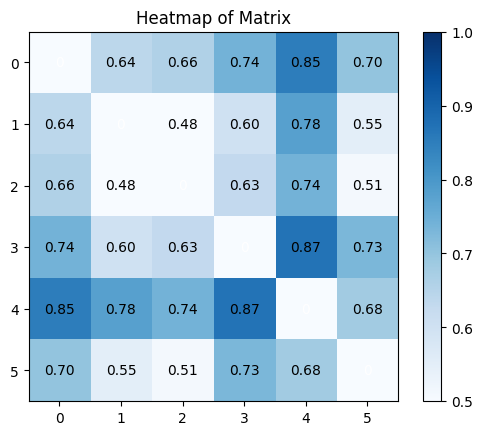

In [22]:
score_square = score.reshape(6,6)

score_square2 = train_score.reshape(6,6)
display(score_square2)

total = 0
for i in range(36):
  total = total + score[i]
average_score = total/30
display(average_score)


total2 = 0
for i in range(36):
  total2 = total2 + train_score[i]
average_score2 = total2/30
display(average_score2)

plt.imshow(score_square, cmap='Blues', interpolation='nearest', vmin=0.5, vmax=1)

for i in range(6):
    for j in range(6):
        if score_square[i, j] != 0:
            plt.text(j, i, f'{score_square[i, j]:.2f}', ha='center', va='center', color='black')
        else:
            plt.text(j, i, '0', ha='center', va='center', color='white')

plt.colorbar()
plt.title('Heatmap of Matrix')
plt.show()

Test Cases

In [45]:
test_cases = pd.read_csv("/content/Test_Frequency_Distributions.csv")
y = test_cases['Genre']

display(test_cases)
Xi = []
for column_name in df.columns:
  if '0' in column_name:
    Xi.append(column_name)

X = test_cases[Xi]
display(X)

Xarray = X.values
song_maxs = Xarray.max(axis=1).reshape(-1,1)
Xnorm = Xarray / song_maxs
X_t = Xnorm

codes, uniques = y.factorize()
y_t = codes
uniques

display(y_t)
display(uniques)


,Title,0,200,400,600,800,1000,1200,1400,1600,...,18200,18400,18600,18800,19000,19200,19400,19600,19800,Genre
0,Kid A,3445391,2.610090e+07,8.062469e+07,2.192595e+07,9.784671e+06,1.765212e+06,3.409231e+06,5.148096e+06,5.360245e+06,...,5903.522446,6491.821380,8.185090e+03,4.504120e+03,4.669285e+03,4.777587e+03,7547.821412,7.848148e+03,5676.865083,electronic
1,Starset - Antigravity (audio),2811388,2.792819e+06,1.761292e+08,7.875154e+07,1.247818e+08,3.595095e+07,9.340997e+07,1.605220e+07,7.445261e+07,...,763113.681996,972552.404719,1.398033e+06,1.073587e+06,2.102958e+06,1.840065e+06,767596.269572,1.201753e+06,997767.402000,metal_punk
2,Starset - Telescope (audio),8883006,1.356161e+08,1.829035e+07,4.204399e+07,8.585412e+07,4.104226e+07,1.425008e+08,1.358311e+07,2.392036e+07,...,7530.739146,5961.401813,5.962563e+03,7.221964e+03,6.851254e+03,1.014576e+04,8314.865568,5.418265e+03,6586.896798,metal_punk
3,Take Five,3197457,2.821475e+07,3.183539e+07,1.313484e+07,5.788187e+07,6.206079e+06,1.553729e+07,5.573659e+06,6.467206e+06,...,4093.384709,3334.178930,3.433099e+03,3.642137e+03,3.582535e+03,2.371733e+03,2389.268100,2.837365e+03,3280.569123,jazz_blues
4,Blue Oyster Cult - (Don t Fear) The Reaper (Au...,329814,1.021544e+08,1.567827e+08,4.321477e+07,6.400912e+07,1.847231e+07,7.887917e+06,3.590137e+07,2.464367e+07,...,4497.979109,3789.728005,3.606218e+03,4.539795e+03,3.564573e+03,3.968957e+03,4193.299166,4.104060e+03,4387.698946,rock_pop
5,Change (In the House of Flies),22185311,3.853188e+07,1.050749e+08,2.305447e+07,5.436133e+07,4.856227e+07,2.242637e+07,2.014400e+07,4.209847e+07,...,15873.617934,6169.414089,9.816251e+03,4.868689e+03,3.379351e+03,1.757683e+04,10421.510112,3.020483e+03,18234.565496,metal_punk
6,Gustav Holst - Jupiter,2833379,3.070193e+07,2.277938e+07,1.530170e+07,1.696743e+07,1.116570e+07,1.110798e+07,1.481357e+07,2.008733e+06,...,48382.323352,167790.377330,3.844745e+04,1.984575e+05,1.157588e+05,1.563478e+05,58735.381020,5.812258e+04,84757.014186,classical


,0,200,400,600,800,1000,1200,1400,1600,1800,...,18000,18200,18400,18600,18800,19000,19200,19400,19600,19800
0,3445391,2.610090e+07,8.062469e+07,2.192595e+07,9.784671e+06,1.765212e+06,3.409231e+06,5.148096e+06,5.360245e+06,2.921426e+05,...,4.608857e+03,5903.522446,6491.821380,8.185090e+03,4.504120e+03,4.669285e+03,4.777587e+03,7547.821412,7.848148e+03,5676.865083
1,2811388,2.792819e+06,1.761292e+08,7.875154e+07,1.247818e+08,3.595095e+07,9.340997e+07,1.605220e+07,7.445261e+07,4.946524e+07,...,2.147470e+06,763113.681996,972552.404719,1.398033e+06,1.073587e+06,2.102958e+06,1.840065e+06,767596.269572,1.201753e+06,997767.402000
2,8883006,1.356161e+08,1.829035e+07,4.204399e+07,8.585412e+07,4.104226e+07,1.425008e+08,1.358311e+07,2.392036e+07,1.174662e+07,...,7.041137e+03,7530.739146,5961.401813,5.962563e+03,7.221964e+03,6.851254e+03,1.014576e+04,8314.865568,5.418265e+03,6586.896798
3,3197457,2.821475e+07,3.183539e+07,1.313484e+07,5.788187e+07,6.206079e+06,1.553729e+07,5.573659e+06,6.467206e+06,1.343720e+07,...,3.440957e+03,4093.384709,3334.178930,3.433099e+03,3.642137e+03,3.582535e+03,2.371733e+03,2389.268100,2.837365e+03,3280.569123
4,329814,1.021544e+08,1.567827e+08,4.321477e+07,6.400912e+07,1.847231e+07,7.887917e+06,3.590137e+07,2.464367e+07,2.072156e+07,...,3.459656e+03,4497.979109,3789.728005,3.606218e+03,4.539795e+03,3.564573e+03,3.968957e+03,4193.299166,4.104060e+03,4387.698946
5,22185311,3.853188e+07,1.050749e+08,2.305447e+07,5.436133e+07,4.856227e+07,2.242637e+07,2.014400e+07,4.209847e+07,4.973454e+07,...,1.540150e+04,15873.617934,6169.414089,9.816251e+03,4.868689e+03,3.379351e+03,1.757683e+04,10421.510112,3.020483e+03,18234.565496
6,2833379,3.070193e+07,2.277938e+07,1.530170e+07,1.696743e+07,1.116570e+07,1.110798e+07,1.481357e+07,2.008733e+06,6.555013e+06,...,5.929108e+04,48382.323352,167790.377330,3.844745e+04,1.984575e+05,1.157588e+05,1.563478e+05,58735.381020,5.812258e+04,84757.014186


array([0, 1, 1, 2, 3, 1, 4])

Index(['electronic', 'metal_punk', 'jazz_blues', 'rock_pop', 'classical'], dtype='object')

In [33]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist

#(X_train, y_train),(X_test, y_test) = mnist.load_data()
#X_train, X_test = X_train / 255.0, X_test / 255.0

num_features = X_train.shape[1] #100
num_classes = 6
# Set a seed value
seed_value = 12345

# Set the seed for the Python random number generator
np.random.seed(seed_value)

# Set the seed for the TensorFlow backend
tf.random.set_seed(seed_value)
model = tf.keras.models.Sequential([
   #tf.keras.layers.Conv1D(8, 3, activation='relu', input_shape=(num_features, 1)),
    #tf.keras.layers.MaxPooling1D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam',
  loss='sparse_categorical_crossentropy',
  metrics=['accuracy'])

model.fit(X_train, y_train, epochs=60)
model.evaluate(X_t, y_t)


Epoch 1/60
29/29 [==============================] - 1s 4ms/step - loss: 1.7879 - accuracy: 0.1789
Epoch 2/60
29/29 [==============================] - 0s 3ms/step - loss: 1.7487 - accuracy: 0.2678
Epoch 3/60
29/29 [==============================] - 0s 3ms/step - loss: 1.7182 - accuracy: 0.3367
Epoch 4/60
29/29 [==============================] - 0s 4ms/step - loss: 1.6906 - accuracy: 0.3478
Epoch 5/60
29/29 [==============================] - 0s 4ms/step - loss: 1.6636 - accuracy: 0.3689
Epoch 6/60
29/29 [==============================] - 0s 4ms/step - loss: 1.6394 - accuracy: 0.3811
Epoch 7/60
29/29 [==============================] - 0s 4ms/step - loss: 1.6218 - accuracy: 0.3733
Epoch 8/60
29/29 [==============================] - 0s 4ms/step - loss: 1.6052 - accuracy: 0.3800
Epoch 9/60
29/29 [==============================] - 0s 2ms/step - loss: 1.5850 - accuracy: 0.4056
Epoch 10/60
29/29 [==============================] - 0s 3ms/step - loss: 1.5696 - accuracy: 0.4078
Epoch 11/60
29/29 [

[1.9272592067718506, 0.2857142984867096]

1/1 [==============================] - 0s 32ms/step
[[0.32841823 0.19322425 0.07056901 0.10554293 0.04398563 0.2582599 ]
 [0.3796792  0.10319257 0.08831473 0.11758315 0.01069996 0.30053046]
 [0.6776946  0.11674649 0.03607502 0.0261991  0.02465726 0.11862754]
 [0.31134358 0.14654869 0.17791718 0.09680741 0.01745953 0.24992369]
 [0.10145955 0.19795288 0.12265204 0.13537379 0.2846782  0.15788363]
 [0.07561052 0.29153383 0.10928018 0.23036782 0.04038934 0.25281835]
 [0.20793535 0.23619308 0.09716957 0.3502109  0.04980268 0.05868849]]
[0, 0, 0, 0, 4, 1, 3]
electronic', 'metal_punk', 'jazz_blues', 'rock_pop', 'classical


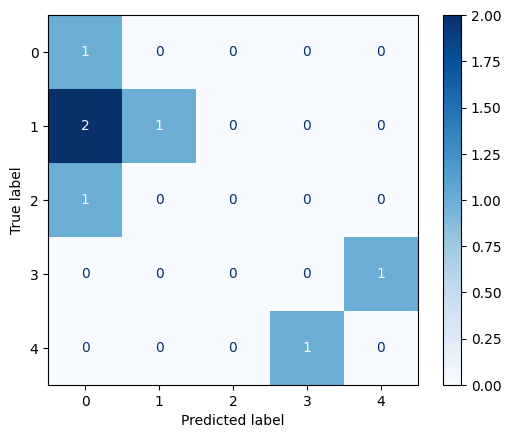

In [44]:
y_pred = model.predict(X_t)
y_pred.shape
y_pred_final = []
print(y_pred)
for i in range(7):
  max = 0.
  index = 0
  for j in range(6):
    if y_pred[i,j] >= max:
      max = y_pred[i,j]
      index = j
  y_pred_final.append(index)
print(y_pred_final)


print("electronic', 'metal_punk', 'jazz_blues', 'rock_pop', 'classical")
ConfusionMatrixDisplay.from_predictions(y_t, y_pred_final, cmap='Blues')
plt.show()